In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg

In [2]:
file = '2022-07-2520.44.13choppy.csv'
data = np.transpose(np.loadtxt('captures/' + file, skiprows=1, delimiter=',')[:,1:4])
time = np.loadtxt('captures/' + file, skiprows=1, delimiter=',')[:,0]
fs = 1/(time[1] - time[0])

In [3]:
#graph colors
colors = ['navy', 'dodgerblue', 'darkviolet']

<IPython.core.display.Javascript object>


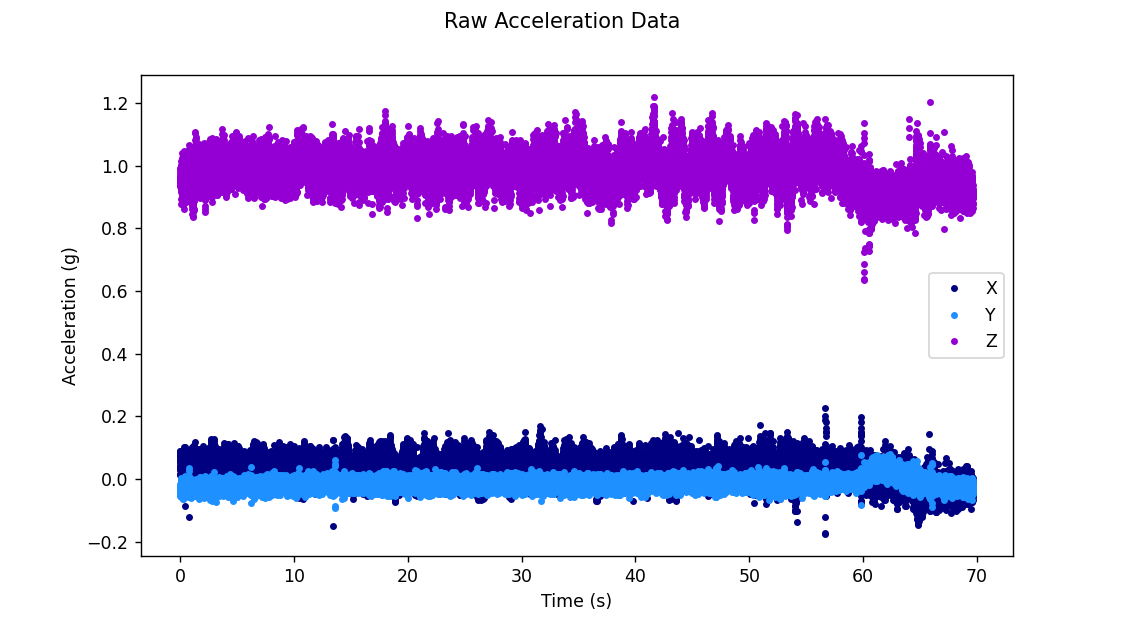

In [4]:
rfig = plt.figure(figsize=(9,5))
plt.suptitle("Raw Acceleration Data")
plt.plot(time, data[0], '.', color=colors[0])
plt.plot(time, data[1], '.', color=colors[1])
plt.plot(time, data[2], '.', color=colors[2])

plt.legend(['X','Y','Z'])
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')

plt.show()

In [5]:
#design filters

#zi multiplier
zi_scale = np.expand_dims(np.mean(data, axis=1),1)

sos_low = sg.butter(5, 1, fs=fs, btype='lowpass', output='sos') #5 tap, 1Hz lowpass
zi_low = np.repeat(np.expand_dims(sg.sosfilt_zi(sos_low),1), 3, axis=1) * zi_scale

sos_band = sg.butter(5, (1, 20), fs=fs, btype='bandpass', output='sos') #5 tap, 1Hz - 20Hz bandpass
zi_band = np.repeat(np.expand_dims(sg.sosfilt_zi(sos_band),1), 3, axis=1) * zi_scale

sos_high = sg.butter(5, 20, fs=fs, btype='highpass', output='sos') #5 tap, 20Hz highpass
zi_high = np.repeat(np.expand_dims(sg.sosfilt_zi(sos_high),1), 3, axis=1) * zi_scale

In [6]:
#apply the filter
data_f_low, zfl = sg.sosfilt(sos_low, data, zi=zi_low)
data_f_band, zfb = sg.sosfilt(sos_band, data, zi=zi_band)
data_f_high, zfh = sg.sosfilt(sos_high, data, zi=zi_high)

<IPython.core.display.Javascript object>


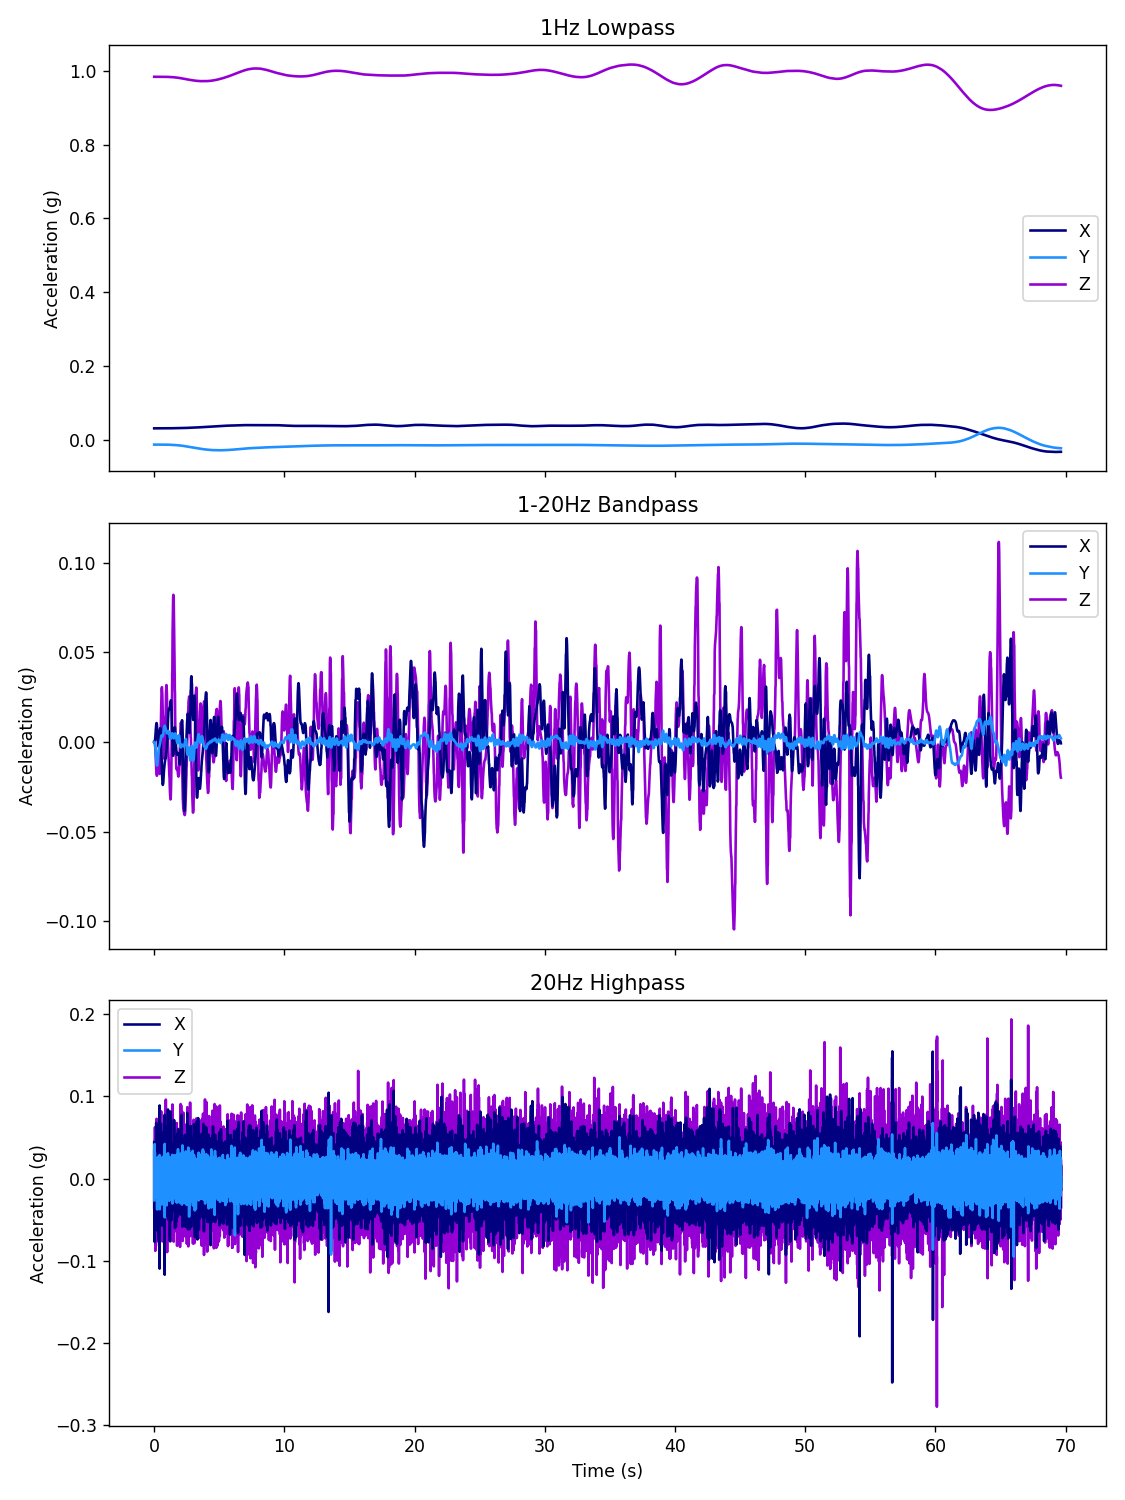

In [7]:
ffig, ffig_axs = plt.subplots(3,1,figsize=(9,12), sharex=True)
ffig.set_tight_layout(True)

ffig_axs[0].plot(time, data_f_low[0], colors[0])
ffig_axs[0].plot(time, data_f_low[1], colors[1])
ffig_axs[0].plot(time, data_f_low[2], colors[2])
ffig_axs[0].legend(['X','Y','Z'])
ffig_axs[0].set_ylabel("Acceleration (g)")
ffig_axs[0].set_title('1Hz Lowpass')

ffig_axs[1].plot(time, data_f_band[0], colors[0])
ffig_axs[1].plot(time, data_f_band[1], colors[1])
ffig_axs[1].plot(time, data_f_band[2], colors[2], zorder=0)
ffig_axs[1].legend(['X','Y','Z'])
ffig_axs[1].set_ylabel("Acceleration (g)")
ffig_axs[1].set_title('1-20Hz Bandpass')

ffig_axs[2].plot(time, data_f_high[0], colors[0])
ffig_axs[2].plot(time, data_f_high[1], colors[1])
ffig_axs[2].plot(time, data_f_high[2], colors[2], zorder=0)
ffig_axs[2].legend(['X','Y','Z'])
ffig_axs[2].set_ylabel("Acceleration (g)")
ffig_axs[2].set_title('20Hz Highpass')

plt.xlabel("Time (s)")


plt.show()

## Spectrograms

<IPython.core.display.Javascript object>


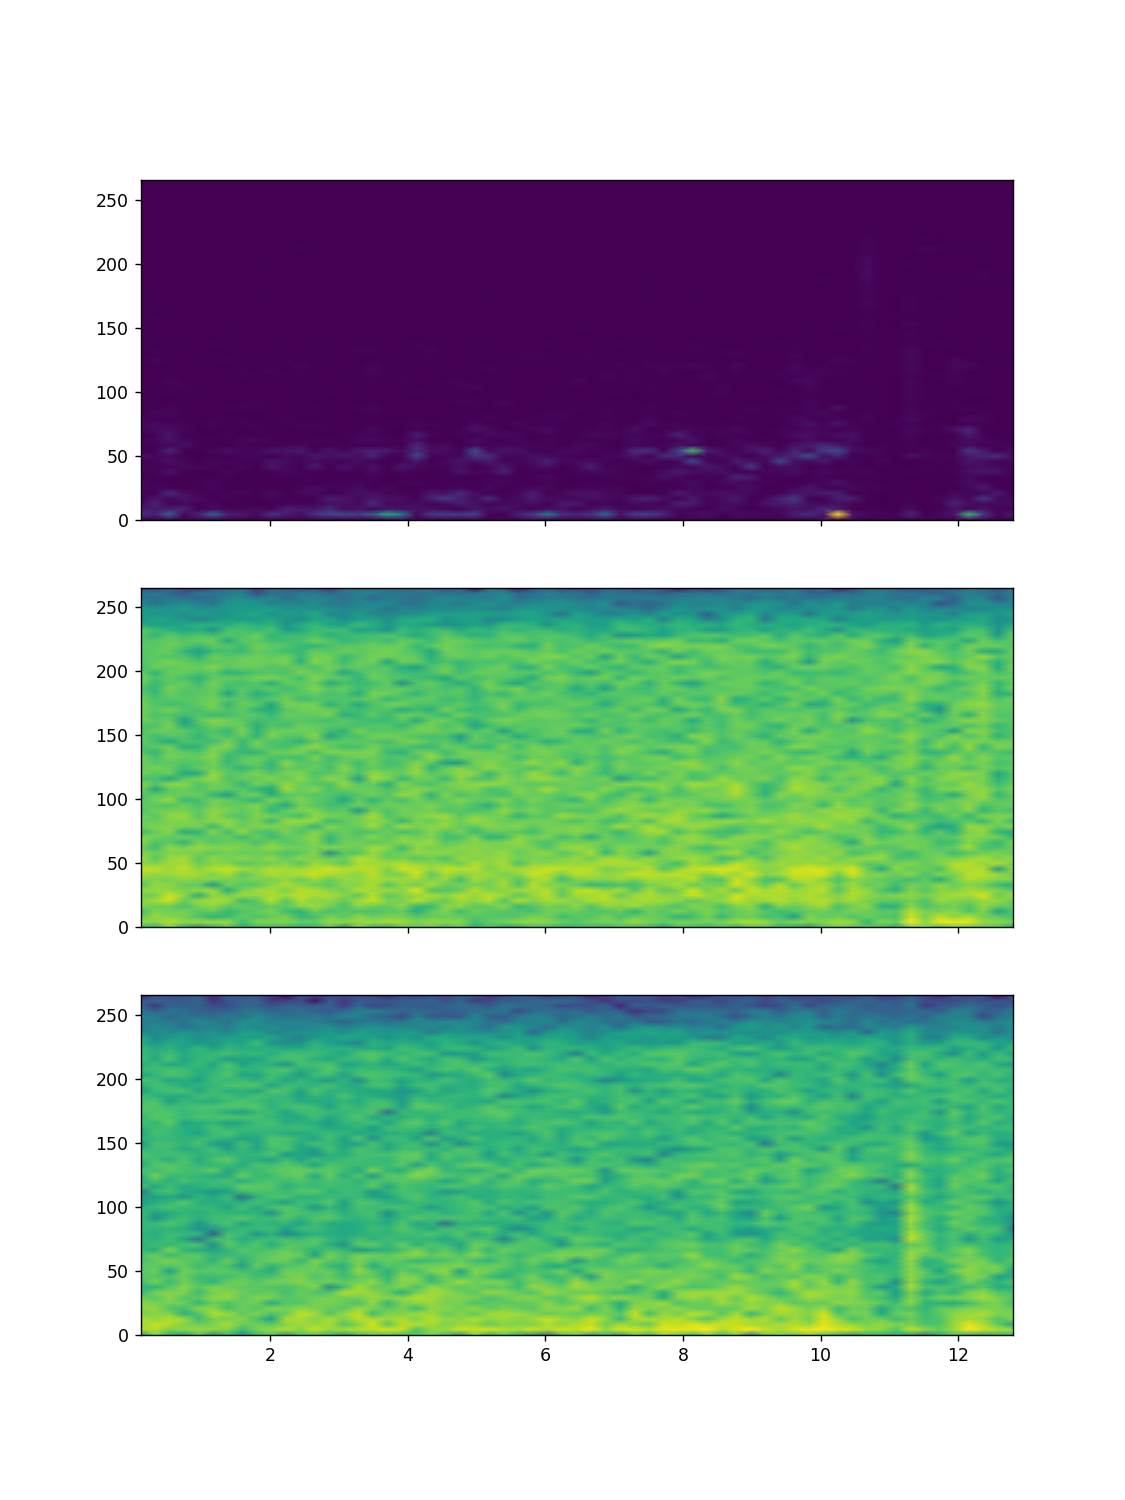

In [40]:
#Compute Spectrograms
f_x, t_x, Sxx_x = sg.spectrogram(x_deci[0] - np.mean(x_deci[0]), fs/q, nperseg=128)
f_y, t_y, Sxx_y = sg.spectrogram(x_deci[1] - np.mean(x_deci[1]), fs/q, nperseg=128)
f_z, t_z, Sxx_z = sg.spectrogram(x_deci[2] - np.mean(x_deci[2]), fs/q, nperseg=128)

sfig, sfig_axs = plt.subplots(3,1,figsize=(9, 12), sharex=True)
sfig_axs[0].pcolormesh(t_x, f_x, Sxx_x, shading='gouraud')

sfig_axs[1].pcolormesh(t_y, f_y, np.log(Sxx_y), shading='gouraud')

sfig_axs[2].pcolormesh(t_z, f_z, np.log(Sxx_z), shading='gouraud')
plt.show()

## PSD